# Time Series Analysis

## Loading libraries

In [4]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

In [5]:
df = pd.read_csv('/monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [7]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [8]:
df.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01',
               ...
               '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01',
               '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01',
               '1995-07-01', '1995-08-01'],
              dtype='datetime64[ns]', name='Month', length=476, freq=None)

In [9]:
df.index.freq = 'MS' # monthly time series data specifying to python (month start)

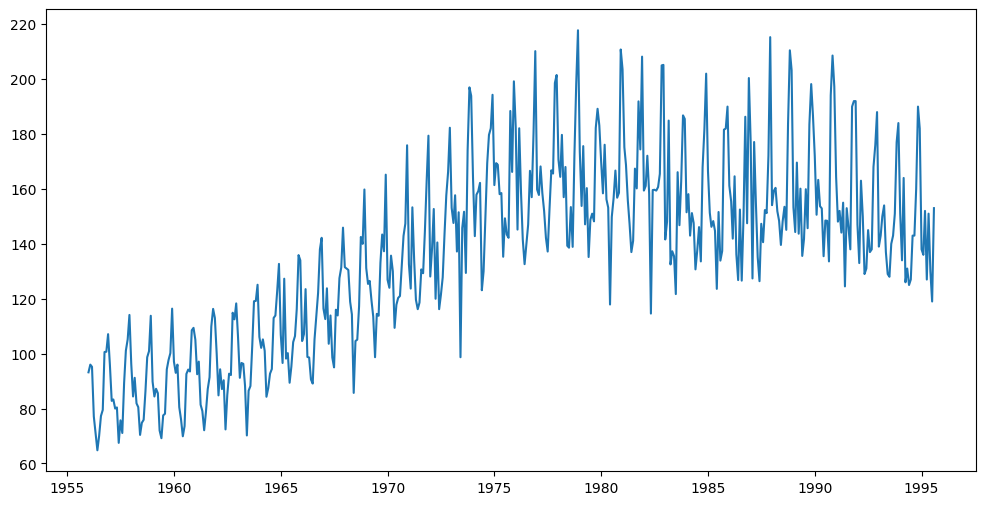

In [10]:
# seasonality!
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis.

* AR (Autoregression) : Model that shows a changing variable that regresses on its own lagged/prior values.
* I (Integrated) : Differencing of raw observations to allow for the time series to become stationary
* MA (Moving average) : Dependency between an observation and a residual error from a moving average model. <br>

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* p: the number of lag observations in the model; also known as the lag order.
* d: the number of times that the raw observations are differenced; also known as the degree of differencing.
* q: the size of the moving average window; also known as the order of the moving average.

Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

There are four seasonal elements that are not part of ARIMA that must be configured; they are:
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

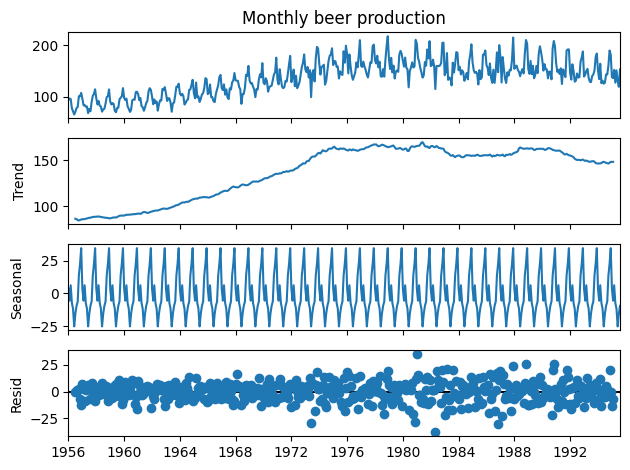

In [11]:
# Time series decomposition is a technique used to break down a time series into its constituent components
# which typically include trend, seasonality, and residual (error) components.
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

In [12]:
help(seasonal_decompose)
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series (e.g., 1 for annual, 4 for quarterly, etc). Must
        be used if x is not a pandas object or if the index of x does not have
        a frequency. Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
 

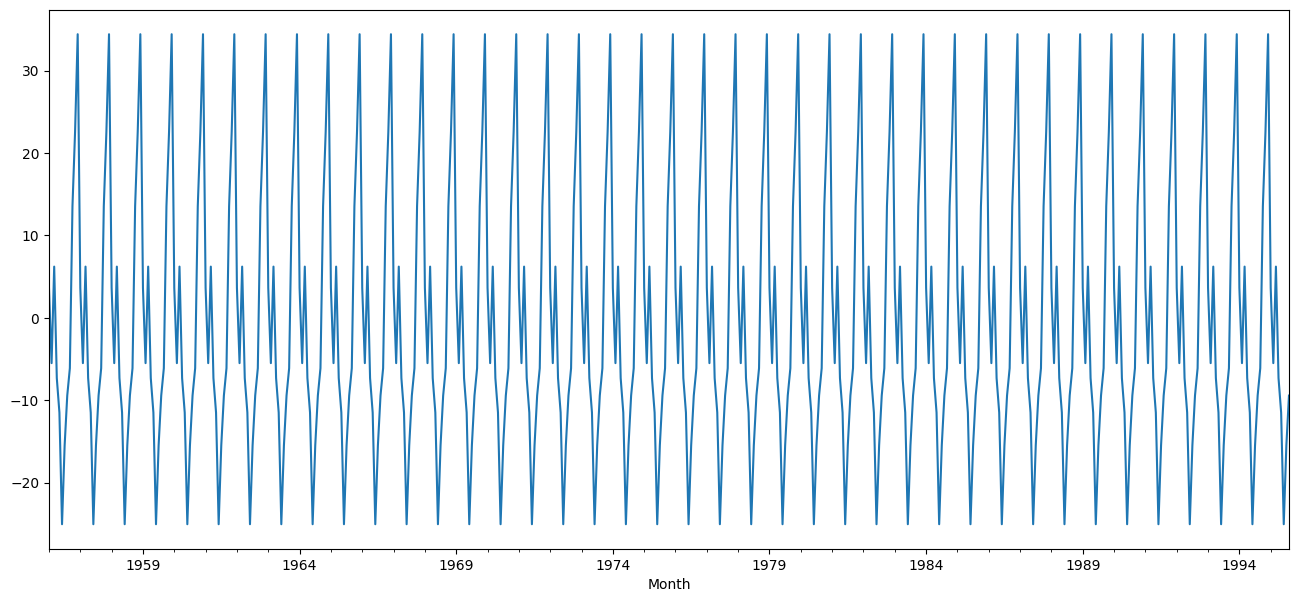

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

### SARIMA Forecast

In [14]:
# Out of time testing
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [15]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.868
Date:                                    Wed, 04 Sep 2024   AIC                           3437.737
Time:                                            03:25:31   BIC                           3483.252
Sample:                                        01-01-1956   HQIC                          3455.655
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1214      0.042     -2.922      0.003      -0.203      -0.040
ar.L2         -0.1793      0.044     -4.065      0.000      -0.266      -0.093
ma.L1         -0.8409      0.028    -30.138      0.000      -0.896      -0.786
ar.S.L12       1.7515      0.107     16.359      0.000       1.542       1.961
ar.S.L24      -1.6051      0.210     -7.649      0.000      -2.016      -1.194
ar.S.L36       0.7830      0.169      4.644      0.000       0.453       1.113
ar.S.L48       0.0693      0.060      1.152      0.249      -0.049       0.187
ma.S.L12      -1.5602      0.117    -13.297      0.000      -1.790      -1.330
ma.S.L24       1.4064      0.198      7.088      0.000       1.017       1.795
ma.S.L36      -0.6792      0.118     -5.758      0.000      -0.910      -0.448
sigma2        84.8200      5.045     16.812      0.000      74.932      94.708
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                39.40
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               4.03   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

,ARIMA Predictions
1994-09-01,134.458442
1994-10-01,157.224115
1994-11-01,181.382726
1994-12-01,183.886059
1995-01-01,144.589497
1995-02-01,137.186397
1995-03-01,151.482611
1995-04-01,133.447860
1995-05-01,138.078729
1995-06-01,120.790795


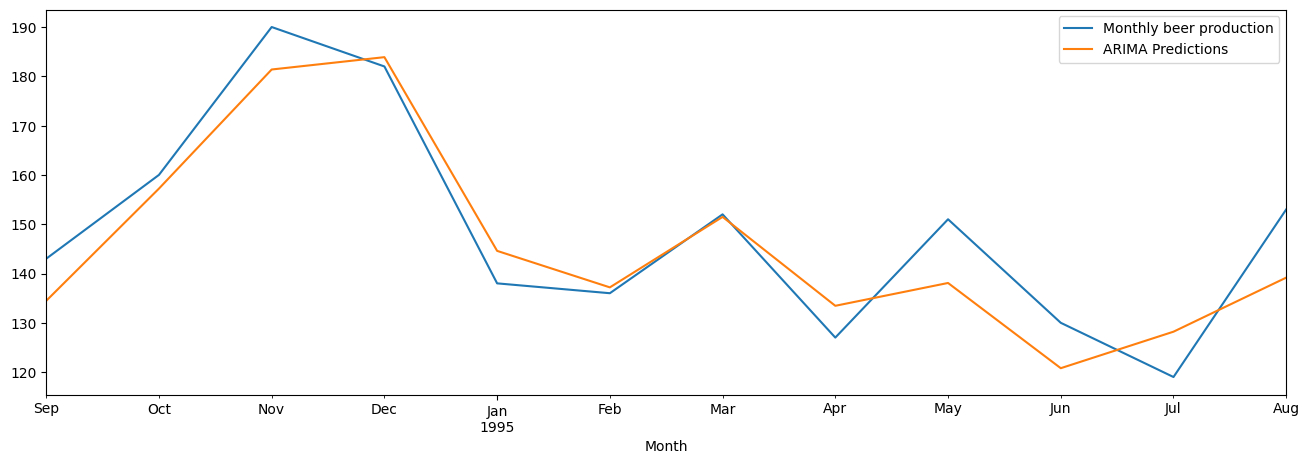

In [17]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [18]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 64.40895564334816
RMSE Error: 8.025519026414937
Mean: 136.3953781512605


## LSTM Neural Network
LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have `short term memory` in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node. LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of `gates`. These are contained in memory blocks which are connected through layers, like this:
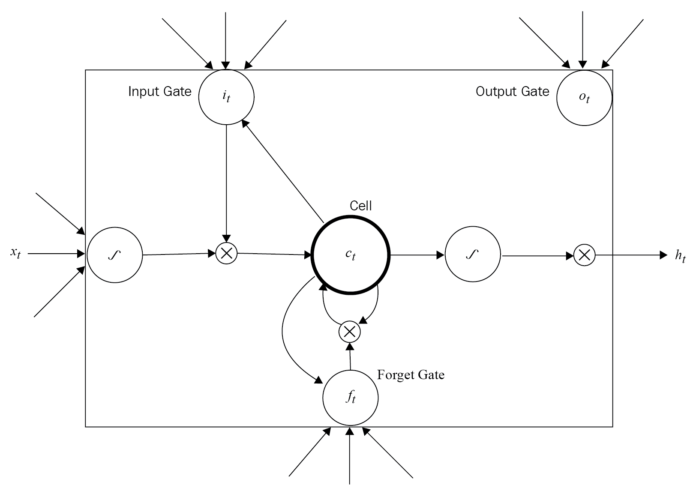

LSTM work There are three types of gates within a unit: Input Gate: Scales input to cell (write) Output Gate: Scales output to cell (read) Forget Gate: Scales old cell value (reset) Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

In [19]:
## Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [21]:
## Creating a time series generator
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12 # sequence length
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
# batch zise = number of sequences trained in one step of each epoch

ImportError: cannot import name 'TimeseriesGenerator' from 'keras.preprocessing.sequence' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/sequence/__init__.py)

In [ ]:
generator

In [ ]:
## Creating a LSTM model (type of RNN)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

In [ ]:
lstm_model.fit_generator(generator, epochs=20)

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

### LSTM Forecast

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

In [ ]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [ ]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data['LSTM_Predictions'])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

## Prophet
Created by Meta, Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [ ]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [ ]:
prophet_pred.tail()

### Prophet Forecast

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

In [ ]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

In [ ]:
test_data['ARIMA_Predictions'] = arima_pred

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [ ]:
test_data